In [479]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [480]:
df = pd.read_csv('dataset.csv')

In [481]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [483]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [484]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [485]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: >

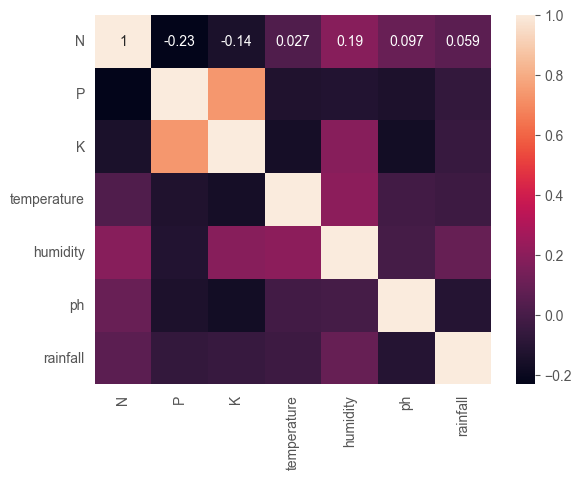

In [486]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True)

In [487]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [488]:
# NeuroRF Model

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

X = df.drop('label', axis=1)
y = df['label'] 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [490]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1117 - loss: 2.9855 - val_accuracy: 0.4602 - val_loss: 2.4227
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4186 - loss: 2.2710 - val_accuracy: 0.7017 - val_loss: 1.6276
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5974 - loss: 1.5807 - val_accuracy: 0.8040 - val_loss: 1.0208
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7039 - loss: 1.1050 - val_accuracy: 0.8608 - val_loss: 0.7044
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7289 - loss: 0.8503 - val_accuracy: 0.8778 - val_loss: 0.5286
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7446 - loss: 0.7425 - val_accuracy: 0.8892 - val_loss: 0.4294
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.6194 - val_accuracy: 0.9006 - val_loss: 0.3683
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8252 - loss: 0.5313 - val_accuracy: 0.9148 - v

In [491]:
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 96.14%


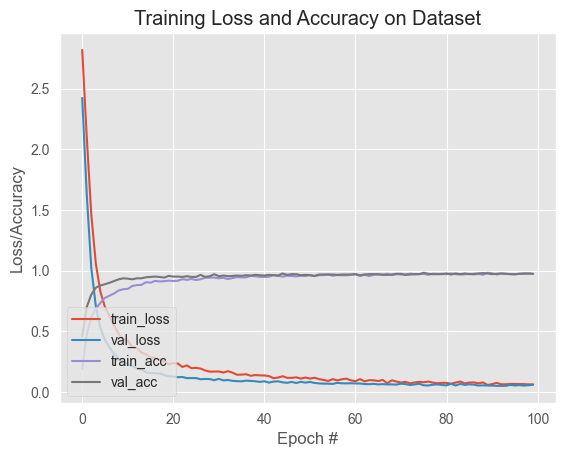

In [492]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [493]:
# Random Forest Classifier

In [494]:
# hyperparameter tuning (grid search + cv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [495]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [496]:
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 300}

In [497]:
rf = RandomForestClassifier(n_estimators=300, max_depth=40)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [498]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [499]:
# accuracy
rf_acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_acc * 100:.2f}%")

Accuracy: 99.09%


In [500]:
# NeuroRF Model (ensemble between Neural Network and Random Forest)

In [501]:
# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier

In [502]:
# NeuroRF Model (stacking)
level0 = list()
level0.append(('neural_network', KerasClassifier(model)))
level0.append(('random_forest', rf))
# define meta learner model
level1 = RandomForestClassifier(n_estimators=300, max_depth=40)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# accuracy
neuro_rf_stack_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {neuro_rf_stack_acc * 100:.2f}%")

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9785 - loss: 0.0636
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0857
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0759
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9681 - loss: 0.0871
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9669 - loss: 0.0879
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9835 - loss: 0.0538
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 97.95%


In [503]:
# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# accuracy
nb_acc = accuracy_score(y_test, y_pred)

In [504]:
# K-Nearst Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# accuracy
knn_acc = accuracy_score(y_test, y_pred)

In [505]:
comparison = pd.DataFrame({
    'Model': ['Naive Bayes', 'K-Nearest Neighboar', 'Neural Network', 'Random Forest', 'NeuroRF (Stacking)'],
    'Accuracy': [nb_acc, knn_acc, test_accuracy, rf_acc, neuro_rf_stack_acc]
})
# convert the accuracy to percentage
comparison['Accuracy'] = comparison['Accuracy'] * 100
# get only 2 fraction
comparison['Accuracy'] = comparison['Accuracy'].round(2)
comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Naive Bayes,99.55
3,Random Forest,99.09
4,NeuroRF (Stacking),97.95
1,K-Nearest Neighboar,97.05
2,Neural Network,96.14


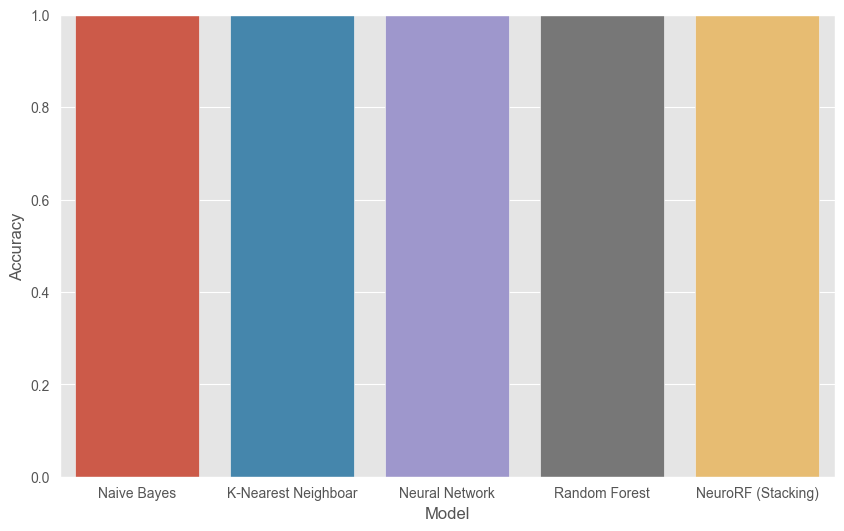

In [506]:
# plot the comparison use chart line
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison)
plt.ylim(0, 1)
plt.show()